In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
folder_img = '/content/drive/MyDrive/imagenes/'

In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [4]:
worksheet = gc.open('Etiquetado').sheet1

In [7]:
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:
# %cd /content/
# !rm -rf images
# !mkdir -p /content/images

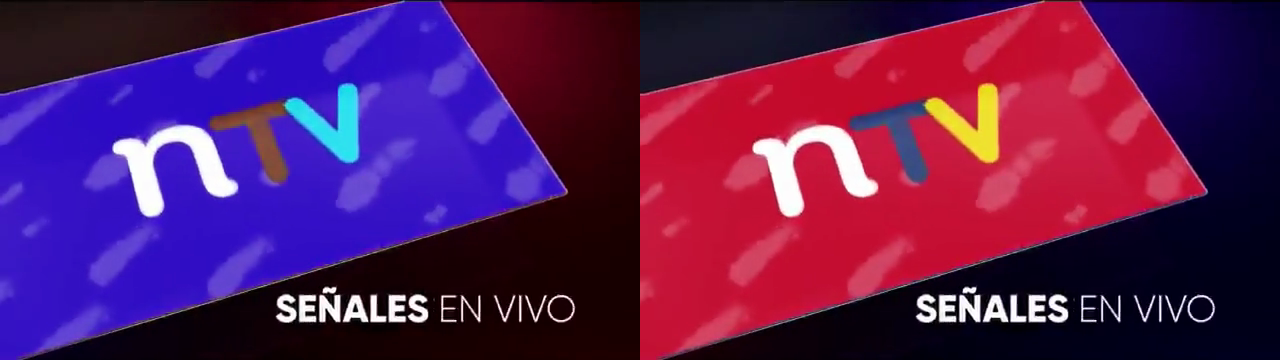

In [9]:
# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

import pandas as pd
df=pd.DataFrame.from_records(rows)
for index, row in df.iterrows():    
    if index>0:
        base_name, _ = os.path.splitext(row[0])        
        image = io.imread(f"{folder_img}{base_name}_frame_{row[1]}.png") 
        image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        final_frame = cv.hconcat((image, image_2))
        cv2_imshow(final_frame)
        print('\n')       
        break

In [ ]:
%cd /content/
!rm -rf noticias
!git clone https://github.com/alvaro-neira/noticias.git
%cd noticias/
!git submodule init
!git submodule update

/content
Cloning into 'noticias'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 225 (delta 115), reused 173 (delta 66), pack-reused 0
Receiving objects: 100% (225/225), 37.35 MiB | 33.03 MiB/s, done.
Resolving deltas: 100% (115/115), done.
/content/noticias
Submodule 'Gender-and-Age-Detection' (https://github.com/alvaro-neira/Gender-and-Age-Detection.git) registered for path 'Gender-and-Age-Detection'
Cloning into '/content/noticias/Gender-and-Age-Detection'...
Submodule path 'Gender-and-Age-Detection': checked out 'b570b6f4c7f27af2b9c8f2fe36ba112b42f4dcb2'
